## Data Preprocessing

#### Import libraries

In [20]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs

#### Import Dataset

In [21]:
df = pd.read_csv("stroke data.csv")

#### Dataset Head

In [22]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Describe Dataset

In [23]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Data Cleaning

#### Check Null Values

In [24]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Imputation

##### Mode of the bmi

In [25]:
df['bmi'].mode()

0    28.7
Name: bmi, dtype: float64

##### Filling missing values with mode

In [26]:
df['bmi'].fillna(28.7,inplace=True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Find Duplicate Values

In [27]:
df.duplicated().sum()

0

#### Outlier Detection

<Axes: >

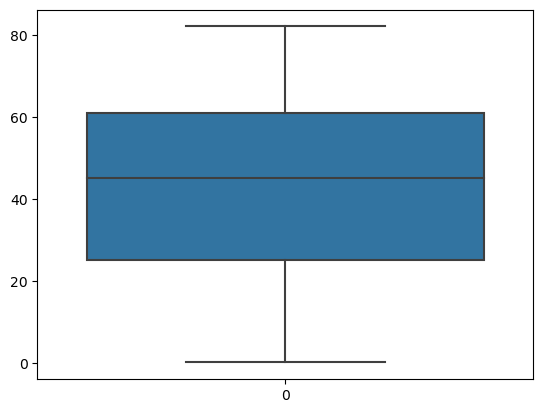

In [28]:
#age column
sn.boxplot(df['age'])

<Axes: >

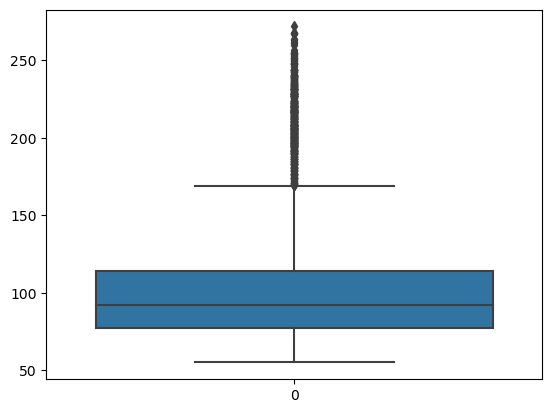

In [29]:
# avg_glucose_level column
sn.boxplot(df['avg_glucose_level'])

In [43]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter DataFrame to exclude outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)] 
    df[column] = df_filtered[column]
    
    return df

In [44]:

# Call the function to remove outliers from 'avg_glucose_level' column
df = remove_outliers_iqr(df, 'avg_glucose_level')

<Axes: >

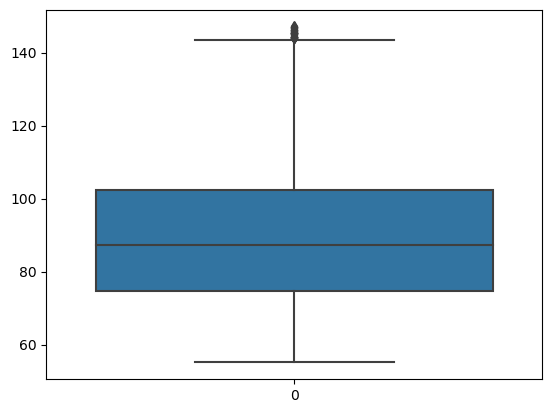

In [45]:
#PLOT OULTLIERS REMOVED avg_glucose_level
sn.boxplot(df['avg_glucose_level'])

<Axes: >

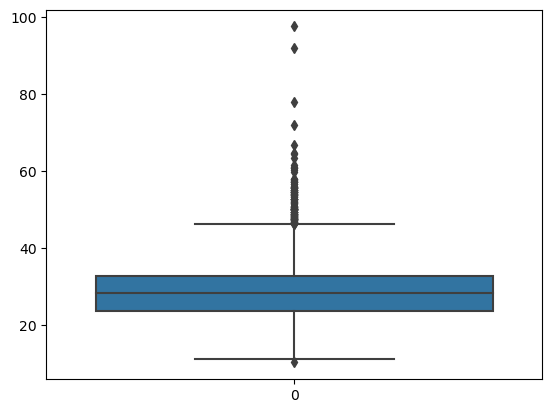

In [32]:
# bmi column 
sn.boxplot(df['bmi'])

#### Convert Categorical values into Numerical values

##### Use One hot encoding

In [33]:
df = pd.get_dummies(df,columns=['gender'],prefix='gender')

In [34]:
df.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other
0,9046,67.0,0,1,Yes,Private,Urban,NaN,36.6,formerly smoked,1,0,1,0
1,51676,61.0,0,0,Yes,Self-employed,Rural,NaN,28.7,never smoked,1,1,0,0
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1,0
3,60182,49.0,0,0,Yes,Private,Urban,NaN,34.4,smokes,1,1,0,0
4,1665,79.0,1,0,Yes,Self-employed,Rural,NaN,24.0,never smoked,1,1,0,0


In [35]:
df = pd.get_dummies(df,columns=['ever_married'],prefix='ever_married')

In [36]:
df.head()

,id,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes
0,9046,67.0,0,1,Private,Urban,NaN,36.6,formerly smoked,1,0,1,0,0,1
1,51676,61.0,0,0,Self-employed,Rural,NaN,28.7,never smoked,1,1,0,0,0,1
2,31112,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,0,1,0,0,1
3,60182,49.0,0,0,Private,Urban,NaN,34.4,smokes,1,1,0,0,0,1
4,1665,79.0,1,0,Self-employed,Rural,NaN,24.0,never smoked,1,1,0,0,0,1


In [37]:
df = pd.get_dummies(df,columns=['work_type'],prefix='work_type')

In [38]:
df.head()

,id,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,67.0,0,1,Urban,NaN,36.6,formerly smoked,1,0,1,0,0,1,0,0,1,0,0
1,51676,61.0,0,0,Rural,NaN,28.7,never smoked,1,1,0,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,Rural,105.92,32.5,never smoked,1,0,1,0,0,1,0,0,1,0,0
3,60182,49.0,0,0,Urban,NaN,34.4,smokes,1,1,0,0,0,1,0,0,1,0,0
4,1665,79.0,1,0,Rural,NaN,24.0,never smoked,1,1,0,0,0,1,0,0,0,1,0


In [39]:
df = pd.get_dummies(df,columns=['Residence_type'],prefix='Residence_type')

In [40]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,9046,67.0,0,1,NaN,36.6,formerly smoked,1,0,1,0,0,1,0,0,1,0,0,0,1
1,51676,61.0,0,0,NaN,28.7,never smoked,1,1,0,0,0,1,0,0,0,1,0,1,0
2,31112,80.0,0,1,105.92,32.5,never smoked,1,0,1,0,0,1,0,0,1,0,0,1,0
3,60182,49.0,0,0,NaN,34.4,smokes,1,1,0,0,0,1,0,0,1,0,0,0,1
4,1665,79.0,1,0,NaN,24.0,never smoked,1,1,0,0,0,1,0,0,0,1,0,1,0


In [41]:
df = pd.get_dummies(df,columns=['smoking_status'],prefix='smoking_status')

In [42]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,NaN,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,NaN,28.7,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,NaN,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,NaN,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
